![Imagen](https://www.bancor.com.ar/static/2cb3aa0ec921fc0874279500d6535da1/Original44-Encabezadoweb-Bancor.jpg)


# MENTORÍA BANCOR

---

### *Grupo N°:* 1

### *Integrantes:*
#### Gonzalez, Patricia
#### Peralta, Agustín
####  Porcel, Carolina
####  Sosa, Manuel

---
## Práctico n°1
### Análisis y visualización

En la siguiente notebook, realizaremos la carga del dataset incial que utilizarán para el práctico de Análisis y Visualización. 
Posteriormente, se detallarán las consignas a seguir para la aprobación del trabajo práctico.

El objetivo de este proyecto es aprender la metodología utilizada para mejorar la tasa de conversión de productos financieros. Puntualmente trabajaremos en la comercialización de Préstamos Personales con detino libre, dado que es un producto sencillo de comprender y al alcance de todos.
El dataset incluye información pertinente a clientes, altas de prestamos, nivel de endeudamiento en el sistema financiero, nivel socio-económico, ingresos, Cross-Selling, nivel de utilización de tarjetas de crédito y otros datos relevantes. 


### Objetivos:






#### Análisis estadístico de variables.

 Seleccionar un conjunto de al menos cuatro variables que consideren particularmente de interés para analizar y:
     
  1 - Usar distintos tipos de gráficos que permitan clarificar la distribucion de las variables. Comentar tipos de distribucion encontrados. ¿Es simetríca o asimétrica? ¿A qué se podria deber dicho comportamiento?

  2 - Calcular estadísticos descriptivos (media, mediana, moda, desviación estandar)
  
  3 - Grafique un gráfico de Boxplot para cada variable y comente los resultados

  3 - ¿Existen valores atípicos? ¿Cuales? Expóngalos gráficamente.
  
  
#### Distribucion de frecuencias

  1 - Distribución etaria de los clientes por cortes de edad cada 10 ó 15 años
   
  2 - Distribución de montos de venta por cortes cada 20.000 pesos
   
  3 - Distibución de Préstamos dados de Alta por tipo de convenio (jubilado nacional, jubilado provincial, etc)
    
  4 - Distribución de Préstamos dados de alta por nivel socio económico
    
  5 - Prestamo promedio por cliente
    
  6 - Prestamo promedio por tipo de canal de alta para el período comprendido
    

#### Analisis de clientes con más de un Préstamo 

  1 - ¿Existen clientes con más de un préstamo dado de alta en el período de análsis? ¿Cuál es la cantidad de préstamos promedio por cliente?
    
  2 - Haga un breve análisis descriptivo de éstos tipos de clientes y coméntelo


#### Análisis de probabilidades condicionales e independencia entre dos variables

  1 - ¿Existe algún tipo de relación entre el alta de Prestamos y el nivel de endeudamiento?

  2 - ¿Existe algún tipo de relación entre la edad del cliente y el canal por el cual solicita el préstamo?

  3 - Seleccione 2 variables más que considere de interés y relaciónelas con el fin de obtener conclusiones preliminares



Utilizar graficos para complementar el análisis

Pueden agregar más análisis que consideren relevantes que sumarán al contenido del práctico. Estos puntos son el mínimo requerido.


### Entregas:

* Breve informe en el cual desarrollen los puntos anteriores, el cual debe incluir:gráficos, resultados obtenidos y las conclusiones obtenidas (no agregar código al informe)

* Notebook que refleje el trabajo realizado en Python. Puede ser la notebook aquí presentada e intervenida por ustedes o bien generar una nueva. 


### Consultas

* Cualquier consulta referente al DataSet o interpretación de variables, canalizarlas por el canal de Slack.

#### Fecha limite de entrega: 20/05/2022


### Importacion y lectura de datos

In [1]:
import pandas as pd
pd.options.display.max_rows=1000
pd.options.display.max_columns=1000
pd.options.display.max_colwidth = 10000
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import datetime
params = {'legend.fontsize': 'large',
         # 'figure.figsize': (15, 5),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
plt.rcParams.update(params)
plt.style.use('fivethirtyeight')
pd.options.display.float_format="{:,.2f}".format

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/quilimartinez/DiploDatos_UniversidadNacionalDeCordoba/main/Dataset_Mentoria.csv")
df.shape

(142473, 45)

In [3]:
df.head(5)

,ID_CLiente_BP,ID_Linea_Prestamo,Canal_Comercializacion,Ctd_Dias_Plazo,MNT_CAPITAL,Tasa,Fec_Desembolso,Fec_Inicio_Prestamo,Fec_Fin_Prestamo,SEXO,EDAD,ANIOS_ANTIGUEDAD,SUCURSAL_ACREDITACION,SEGMENTO360,CLASIFICACIONCLIENTE,SHARE_MERCADO,TOTAL_ADEUDADO,CANTIDAD_ENTIDADES,SITUACION,POTENCIALIDAD_PP,MONTO_POTENCIAL_PP,UTILIZACION_TC,UTILIZACION_TD,CLASIFICACION_VALOR_MAC,BANCON_ACTIVO1,CANTIDAD_PRODUCTOS,TIENE_CAJA_AHORRO,TIENE_TARJETA_CREDITO,TIENE_PRESTAMO_PERSONAL,CANTIDAD_PRESTAMOS_PERSONALES,TIENE_PRESTAMO_HIPOTECARIO,CANTIDAD_PRESTAMOS_HIPOTECARIOS,USA_CUENTA_CORRIENTE,USA_CUENTA_ADELANTO,TIENE_SEGURO_VIDA,TIENE_SEGURO_PATRIMONIAL,TIENE_PLAZO_FIJO,TIENE_FONDO_COMUN_INVERSION,TIENE_DOLARES,TIENE_CAJA_SEGURIDAD,INGRESO,NSE,ENDEUDAMIENTO_202103,ROL_MONOTIIBB,REGIMEN_MONOT_IIBB
0,49950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,73,13,326,Clientes Cuenta Sueldo,BI JUBILADOS ANSES,0.99,78,2,1,1.00,61500,Medio,Medio,Alto,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,18410,G,0.59,sd,sd
1,49951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,73,20,302,Clientes Cuenta Sueldo,BI JUBILADOS PROVINCIA,1.00,52,1,1,1.00,380500,Bajo,Bajo,Muy Alto,1,3,1,1,0,0,0,0,0,0,0,0,0,0,1,0,50473,D,0.21,sd,sd
2,49965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,76,18,429,Clientes Cuenta Sueldo,BI JUBILADOS PROVINCIA,0.00,24,1,1,1.00,317600,sd,Alto,Alto,0,2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,56184,D,0.00,sd,sd
3,49968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,75,18,429,Clientes Cuenta Sueldo,BI JUBILADOS PROVINCIA,1.00,3,1,1,1.00,216500,Bajo,Bajo,Muy Alto,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,44517,D,0.01,MONOTRIBUTO,D
4,49969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,75,13,305,Clientes Cuenta Sueldo,BI JUBILADOS PROVINCIA,0.00,0,0,1,1.00,230100,sd,sd,Alto,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,37185,E,0.00,MONOTRIBUTO,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142473 entries, 0 to 142472
Data columns (total 45 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   ID_CLiente_BP                    142473 non-null  int64  
 1   ID_Linea_Prestamo                62473 non-null   object 
 2   Canal_Comercializacion           62473 non-null   object 
 3   Ctd_Dias_Plazo                   62390 non-null   float64
 4   MNT_CAPITAL                      62473 non-null   float64
 5   Tasa                             62473 non-null   float64
 6   Fec_Desembolso                   62473 non-null   object 
 7   Fec_Inicio_Prestamo              62473 non-null   object 
 8   Fec_Fin_Prestamo                 62445 non-null   object 
 9   SEXO                             142473 non-null  object 
 10  EDAD                             142473 non-null  int64  
 11  ANIOS_ANTIGUEDAD                 142473 non-null  int64  
 12  SU

In [5]:
display(df.isnull().sum() / df.shape[0])

df.isnull().sum()


ID_CLiente_BP                     0.00
ID_Linea_Prestamo                 0.56
Canal_Comercializacion            0.56
Ctd_Dias_Plazo                    0.56
MNT_CAPITAL                       0.56
Tasa                              0.56
Fec_Desembolso                    0.56
Fec_Inicio_Prestamo               0.56
Fec_Fin_Prestamo                  0.56
SEXO                              0.00
EDAD                              0.00
ANIOS_ANTIGUEDAD                  0.00
SUCURSAL_ACREDITACION             0.00
SEGMENTO360                       0.00
CLASIFICACIONCLIENTE              0.00
SHARE_MERCADO                     0.00
TOTAL_ADEUDADO                    0.00
CANTIDAD_ENTIDADES                0.00
SITUACION                         0.00
POTENCIALIDAD_PP                  0.00
MONTO_POTENCIAL_PP                0.00
UTILIZACION_TC                    0.00
UTILIZACION_TD                    0.00
CLASIFICACION_VALOR_MAC           0.00
BANCON_ACTIVO1                    0.00
CANTIDAD_PRODUCTOS       

ID_CLiente_BP                          0
ID_Linea_Prestamo                  80000
Canal_Comercializacion             80000
Ctd_Dias_Plazo                     80083
MNT_CAPITAL                        80000
Tasa                               80000
Fec_Desembolso                     80000
Fec_Inicio_Prestamo                80000
Fec_Fin_Prestamo                   80028
SEXO                                   0
EDAD                                   0
ANIOS_ANTIGUEDAD                       0
SUCURSAL_ACREDITACION                  0
SEGMENTO360                            0
CLASIFICACIONCLIENTE                   0
SHARE_MERCADO                          0
TOTAL_ADEUDADO                         0
CANTIDAD_ENTIDADES                     0
SITUACION                              0
POTENCIALIDAD_PP                       0
MONTO_POTENCIAL_PP                     0
UTILIZACION_TC                         0
UTILIZACION_TD                         0
CLASIFICACION_VALOR_MAC                0
BANCON_ACTIVO1  

In [6]:
df.describe()

,ID_CLiente_BP,Ctd_Dias_Plazo,MNT_CAPITAL,Tasa,EDAD,ANIOS_ANTIGUEDAD,SUCURSAL_ACREDITACION,SHARE_MERCADO,TOTAL_ADEUDADO,CANTIDAD_ENTIDADES,SITUACION,POTENCIALIDAD_PP,MONTO_POTENCIAL_PP,BANCON_ACTIVO1,CANTIDAD_PRODUCTOS,TIENE_CAJA_AHORRO,TIENE_TARJETA_CREDITO,TIENE_PRESTAMO_PERSONAL,CANTIDAD_PRESTAMOS_PERSONALES,TIENE_PRESTAMO_HIPOTECARIO,CANTIDAD_PRESTAMOS_HIPOTECARIOS,USA_CUENTA_CORRIENTE,USA_CUENTA_ADELANTO,TIENE_SEGURO_VIDA,TIENE_SEGURO_PATRIMONIAL,TIENE_PLAZO_FIJO,TIENE_FONDO_COMUN_INVERSION,TIENE_DOLARES,TIENE_CAJA_SEGURIDAD,INGRESO,ENDEUDAMIENTO_202103
count,"142,473.00","62,390.00","62,473.00","62,473.00","142,473.00","142,473.00","142,473.00","142,473.00","142,473.00","142,473.00","142,473.00","142,473.00","142,473.00","142,473.00","142,473.00","142,473.00","142,473.00","142,473.00","142,473.00","142,473.00","142,473.00","142,473.00","142,473.00","142,473.00","142,473.00","142,473.00","142,473.00","142,473.00","142,473.00","142,473.00","142,473.00"
mean,"590,376.33",48.29,"80,283.73",46.97,59.02,14.74,543.71,0.55,156.88,1.46,1.22,0.67,"238,243.40",0.72,2.78,1.00,0.63,0.43,1.48,0.00,0.00,0.01,0.17,0.21,0.06,0.14,0.00,0.11,0.02,"60,888.90",0.23
std,"648,123.87",24.52,"117,268.64",6.62,14.22,6.74,268.27,0.43,366.41,1.16,0.69,0.43,"301,466.19",0.45,1.23,0.01,0.48,0.50,2.73,0.04,0.04,0.08,0.38,0.40,0.23,0.35,0.06,0.31,0.13,"50,996.18",2.27
min,22.00,12.00,0.00,-1.00,18.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"166,467.00",24.00,"17,201.00",44.00,53.00,13.00,329.00,0.00,12.00,1.00,1.00,0.16,"28,800.00",0.00,2.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"21,409.00",0.00
50%,"289,581.00",60.00,"40,626.00",49.00,62.00,13.00,386.00,0.71,75.00,1.00,1.00,1.00,"139,400.00",1.00,3.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"50,080.00",0.13
75%,"755,492.00",72.00,"92,263.00",50.00,69.00,18.00,912.00,1.00,193.00,2.00,1.00,1.00,"334,500.00",1.00,4.00,1.00,1.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"81,467.00",0.31
max,"2,752,219.00",72.00,"2,232,452.00",73.00,82.00,67.00,943.00,1.00,"39,539.00",14.00,11.00,1.00,"2,875,000.00",1.00,9.00,1.00,1.00,1.00,37.00,1.00,3.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,"1,362,310.00",500.56


# **Análisis estadístico de variables**


Selección de variables de interés



In [7]:
cols_interest = ['MNT_CAPITAL','EDAD','ANIOS_ANTIGUEDAD','CANTIDAD_PRESTAMOS_PERSONALES','INGRESO','TOTAL_ADEUDADO','CLASIFICACIONCLIENTE','SEXO','CLASIFICACION_VALOR_MAC']

**1. Graficamos la distribución de las variables**

In [8]:
df['CLASIFICACION_VALOR_MAC']= df['CLASIFICACION_VALOR_MAC'].str.upper()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


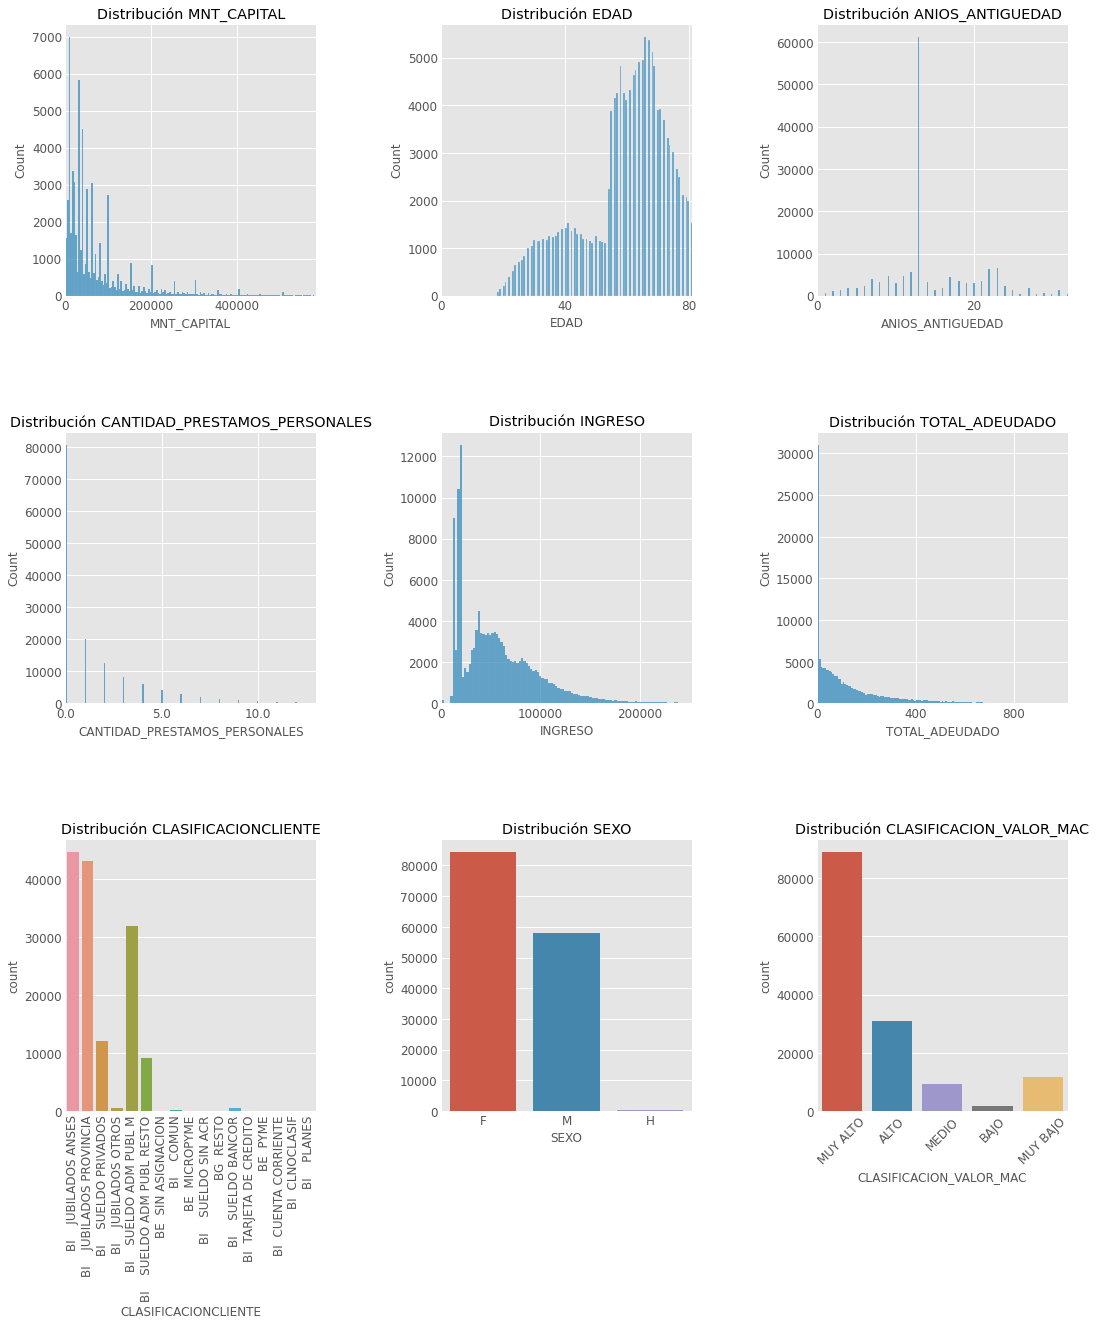

In [9]:
plt.style.use("ggplot")
plt.figure(figsize=(16,20))
for i in enumerate(cols_interest):
  plt.subplots_adjust(hspace=.5,wspace=.5)
  if i[1] not in ('SEXO','CLASIFICACIONCLIENTE','CLASIFICACION_VALOR_MAC'):
    ax=plt.subplot(3,3,i[0]+1)
    sns.histplot(df[i[1]]).set_title("Distribución "+str(i[1]))
    ax.set_xlim(0,df[i[1]].quantile(.99))
    xticks=ax.xaxis.get_major_ticks()
    for c in range(len(xticks)):
        if c%2==1:
            xticks[c].set_visible(False)
  if i[1] in ('SEXO','CLASIFICACIONCLIENTE'):
    ax=plt.subplot(3,3,i[0]+1)
    sns.countplot(df[i[1]]).set_title("Distribución "+str(i[1]))
    if i[1] == 'CLASIFICACIONCLIENTE':
      plt.xticks(rotation=90)
  if i[1] == 'CLASIFICACION_VALOR_MAC':
    ax=plt.subplot(3,3,i[0]+1)
    sns.countplot(df[i[1]],order=['MUY ALTO','ALTO','MEDIO','BAJO','MUY BAJO']).set_title("Distribución "+str(i[1]))
    plt.xticks(rotation=45)

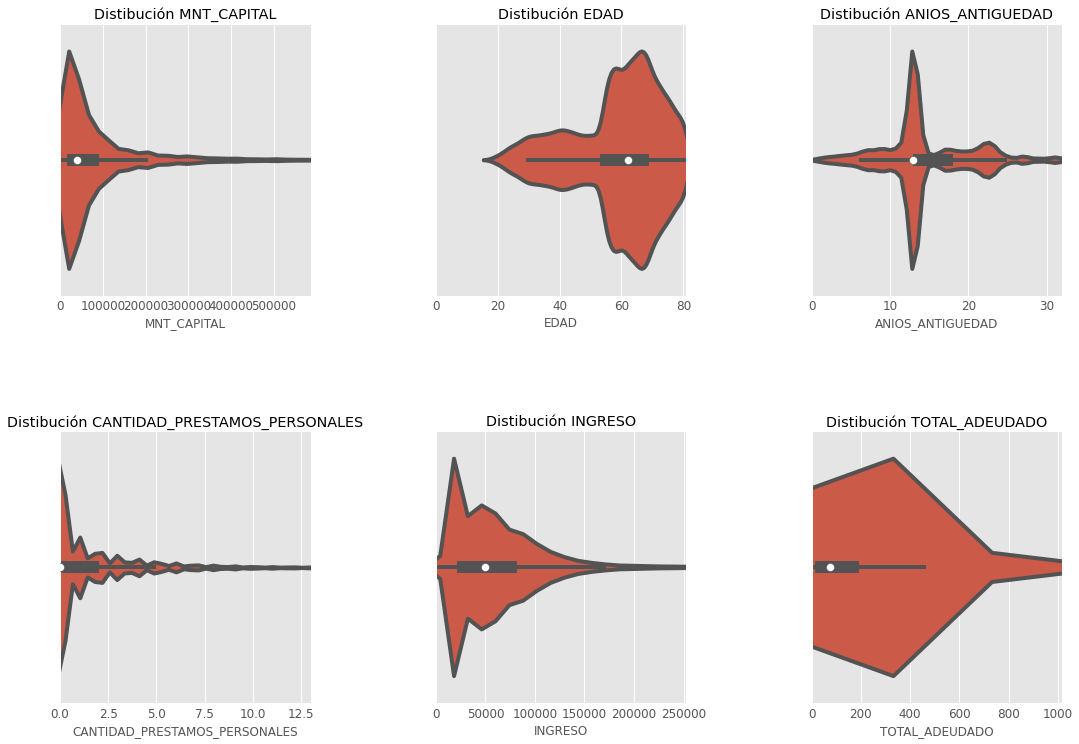

In [10]:
plt.style.use("ggplot")
plt.figure(figsize=(16,20))
for i in enumerate(cols_interest):
  plt.subplots_adjust(hspace=.5,wspace=.5)
  if i[1] not in ('SEXO','CLASIFICACIONCLIENTE','CLASIFICACION_VALOR_MAC'):
    ax=plt.subplot(3,3,i[0]+1)
    sns.violinplot(x=df[i[1]],orient="h").set_title("Distibución "+str(i[1]))
    ax.set_xlim(0,df[i[1]].quantile(.99))

`*`Monto de Capital`*`: La distribución de la variable es asimétrica hacia la derecha. La mayoría de los préstamos se concentran en montos menores a $ 100.000

`*`Edad`*`: La distribución de la variable es asimétrica hacia la izquierda. Esto podría deberse al hecho de que la mayoría de los clientes son jubilados, que tienen en el banco su cuenta para sus cobrar haberes.

`*`Años de antiguedad`*`: La distribución de la variable se asemeja a una distribución normal. Podemos observar a simple vista una medida de moda en el valor de 13 años. Para mayor inferencia deberíamos ahondar más en el análisis.

`*`Cantidad de prestamos personales`*`: La distribución de la variable es asimétrica hacia la derecha.

`*`Ingreso`*`: La distribución de la variable es asimétrica hacia la derecha. La mayoría de los clientes tienen ingresos menores a $ 100.000. Tiene concordancia con lo visto en el monto de capital. A primera vista y por lógica, estas variables podrían estar relacionadas.

`*`Total Adeudado`*`: La distribución de la variable es asimétrica hacia la derecha. La mayoría de los clientes debe menos de $ 200.000

`*`Sexo`*`: Hay mayor cantidad de clientes de sexo femenino. En principio habría algún tipo de herror en el registro H, que con posterioridad habría que analizar.

`*`Clasificación de cliente`*`: La mayoría de los clientes son jubilados con su cuenta de haberes en el banco (esto está relacionado con la variable edad) y aquellos que cobran sus salarios a través de cuentas sueldo en la misma entidad.

**2. Cálculo de estadísticos descriptivos**

In [11]:
df[cols_interest].describe()

,MNT_CAPITAL,EDAD,ANIOS_ANTIGUEDAD,CANTIDAD_PRESTAMOS_PERSONALES,INGRESO,TOTAL_ADEUDADO
count,"62,473.00","142,473.00","142,473.00","142,473.00","142,473.00","142,473.00"
mean,"80,283.73",59.02,14.74,1.48,"60,888.90",156.88
std,"117,268.64",14.22,6.74,2.73,"50,996.18",366.41
min,0.00,18.00,0.00,0.00,0.00,0.00
25%,"17,201.00",53.00,13.00,0.00,"21,409.00",12.00
50%,"40,626.00",62.00,13.00,0.00,"50,080.00",75.00
75%,"92,263.00",69.00,18.00,2.00,"81,467.00",193.00
max,"2,232,452.00",82.00,67.00,37.00,"1,362,310.00","39,539.00"


In [12]:
for col in cols_interest:
  if col in ('SEXO','CLASIFICACIONCLIENTE','CLASIFICACION_VALOR_MAC'):
    print(col)
    m = df[col].value_counts()
    print(col,m)
    print("\n")
  else:
    print(col)
    media = df[col].mean()
    mediana = df[col].median()
    moda = df[col].mode()[0]
    std = df[col].std()
    print('Media',"{:.2f}".format(media))
    print('Mediana',"{:.2f}".format(mediana))
    print('Moda',"{:.2f}".format(moda))
    print('Desviación Estandar',"{:.2f}".format(std))
    print("\n")


MNT_CAPITAL
Media 80283.73
Mediana 40626.00
Moda 30479.00
Desviación Estandar 117268.64


EDAD
Media 59.02
Mediana 62.00
Moda 66.00
Desviación Estandar 14.22


ANIOS_ANTIGUEDAD
Media 14.74
Mediana 13.00
Moda 13.00
Desviación Estandar 6.74


CANTIDAD_PRESTAMOS_PERSONALES
Media 1.48
Mediana 0.00
Moda 0.00
Desviación Estandar 2.73


INGRESO
Media 60888.90
Mediana 50080.00
Moda 18884.00
Desviación Estandar 50996.18


TOTAL_ADEUDADO
Media 156.88
Mediana 75.00
Moda 0.00
Desviación Estandar 366.41


CLASIFICACIONCLIENTE
CLASIFICACIONCLIENTE BI    JUBILADOS ANSES          44565
BI    JUBILADOS PROVINCIA      43067
BI    SUELDO ADM PUBL M        31817
BI    SUELDO PRIVADOS          12148
BI    SUELDO ADM PUBL RESTO     9230
BI    JUBILADOS OTROS            618
BI    SUELDO BANCOR              589
BI    COMUN                      263
BE  MICROPYME                     89
BI    SUELDO SIN ACR              39
BE  SIN ASIGNACION                29
BE  PYME                          10
BI  TARJETA DE C

**3. Gráfico de Boxplot para cada variable y valores atípicos**

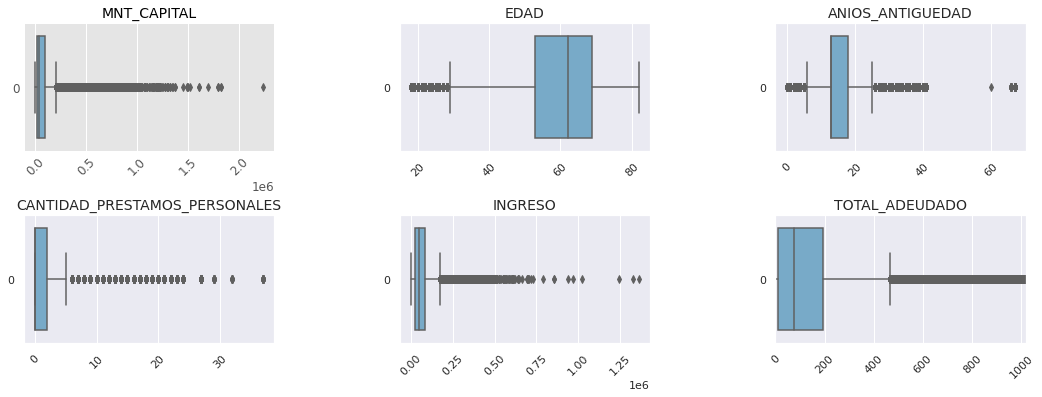

In [13]:
plt.figure(figsize=(16,20))
for i in enumerate(cols_interest):
  plt.subplots_adjust(hspace=.5,wspace=.5)
  if i[1] in ('SEXO','CLASIFICACIONCLIENTE','CLASIFICACION_VALOR_MAC'):
    continue
  elif i[1] == 'TOTAL_ADEUDADO':
    ax=plt.subplot(6,3,i[0]+1)
    sns.set(style="darkgrid")
    sns.boxplot(data=df[i[1]],
                    palette="Blues",orient="h").set_title(i[1], fontsize = 14)
    plt.xticks(rotation=45)
    plt.xlim(0, df[i[1]].quantile(.99))
  else:
    ax=plt.subplot(6,3,i[0]+1)
    sns.set(style="darkgrid")
    sns.boxplot(data=df[i[1]],
                    palette="Blues",orient="h").set_title(i[1], fontsize = 14)
    plt.xticks(rotation=45)
plt.show()

In [14]:
df['MNT_CAPITAL'].describe()

count      62,473.00
mean       80,283.73
std       117,268.64
min             0.00
25%        17,201.00
50%        40,626.00
75%        92,263.00
max     2,232,452.00
Name: MNT_CAPITAL, dtype: float64

In [15]:
for col in cols_interest:
  if col in ('SEXO','CLASIFICACIONCLIENTE','CLASIFICACION_VALOR_MAC'):
    continue
  else:
    max_non_a = df[col].quantile(.75) + (df[col].quantile(.75)-df[col].quantile(.25))*1.5
    min_non_a = df[col].quantile(.25) - (df[col].quantile(.75)-df[col].quantile(.25))*1.5
    greater_max = len(df[df[col]>max_non_a][col])
    lower_min = len(df[df[col]<min_non_a][col])
    perc_greater_max = greater_max/len(df) * 100
    perc_lower_min = lower_min/len(df) * 100
    print(col)
    print("Maximo no atípico","{:.2f}".format(max_non_a))
    print("Minimo no atípico","{:.2f}".format(min_non_a))
    print("Cantidad mayores a Maximo","{:.2f}".format(greater_max))
    print("Cantidad menores a Minimo","{:.2f}".format(lower_min))
    print("Porcentaje de mayores a Maximo","{:.2f}".format(perc_greater_max),"%")
    print("Porcentaje de menores a Mínimo","{:.2f}".format(perc_lower_min),"%")
    print("\n")
    

MNT_CAPITAL
Maximo no atípico 204856.00
Minimo no atípico -95392.00
Cantidad mayores a Maximo 5583.00
Cantidad menores a Minimo 0.00
Porcentaje de mayores a Maximo 3.92 %
Porcentaje de menores a Mínimo 0.00 %


EDAD
Maximo no atípico 93.00
Minimo no atípico 29.00
Cantidad mayores a Maximo 0.00
Cantidad menores a Minimo 5548.00
Porcentaje de mayores a Maximo 0.00 %
Porcentaje de menores a Mínimo 3.89 %


ANIOS_ANTIGUEDAD
Maximo no atípico 25.50
Minimo no atípico 5.50
Cantidad mayores a Maximo 6522.00
Cantidad menores a Minimo 6670.00
Porcentaje de mayores a Maximo 4.58 %
Porcentaje de menores a Mínimo 4.68 %


CANTIDAD_PRESTAMOS_PERSONALES
Maximo no atípico 5.00
Minimo no atípico -3.00
Cantidad mayores a Maximo 10740.00
Cantidad menores a Minimo 0.00
Porcentaje de mayores a Maximo 7.54 %
Porcentaje de menores a Mínimo 0.00 %


INGRESO
Maximo no atípico 171554.00
Minimo no atípico -68678.00
Cantidad mayores a Maximo 4120.00
Cantidad menores a Minimo 0.00
Porcentaje de mayores a Maximo 2.

In [16]:
max_non_a = df['MNT_CAPITAL'].quantile(.75) + (df['MNT_CAPITAL'].quantile(.75)-df['MNT_CAPITAL'].quantile(.25))*1.5
max_non_a

204856.0

In [17]:
len(df[df['MNT_CAPITAL']>max_non_a]['MNT_CAPITAL'])

5583

Como ejemplo de la interpretación de los datos obtenidos, para la variable Monto Capital podemos observar mediante el gráfico y con los cálculos que los valores que están por encima de 204856 son outliers y representan un 4% de los reg.



## Distribucion de frecuencias
**1 - Distribución etaria de los clientes por cortes de edad cada 10 ó 15 años**

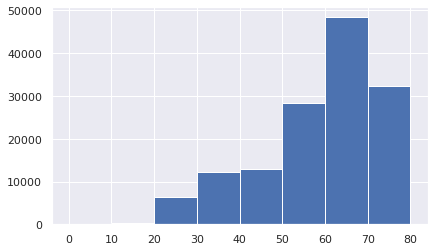

In [18]:
df.EDAD.hist(bins = np.arange(0,90,10))

Los los clientes entre 60 y 70 años es el grupo más frecuente

> Bloc con sangría




**2 - Distribución de montos de venta por cortes cada 20.000 pesos**

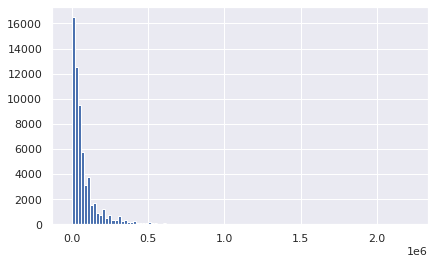

In [19]:
#diferenciar 0 de los > 0
col = 'MNT_CAPITAL'
bins_detail = np.arange(-19999.9, df[col].max(), 20000)
df[col].hist(bins = bins_detail)
plt.show()

In [20]:
df[col].min()

0.0

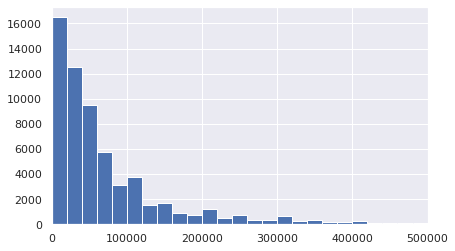

In [21]:
#diferenciar 0 de los > 0
col = 'MNT_CAPITAL'
bins_detail = np.arange(-19999.9, df[col].max(), 20000)
df[col].hist(bins = bins_detail)
plt.xlim([0,0.5e6])
plt.show()

La mayor parte de los prestamos (excluyendo el 0) están entre 20000 y 60000 

Está sesgado hacia la derecha

Esta variable tiene valores extremos


**3 - Distribución de Préstamos dados de Alta por tipo de convenio (jubilado nacional, jubilado provincial, etc)**

<Figure size 1080x1080 with 0 Axes>

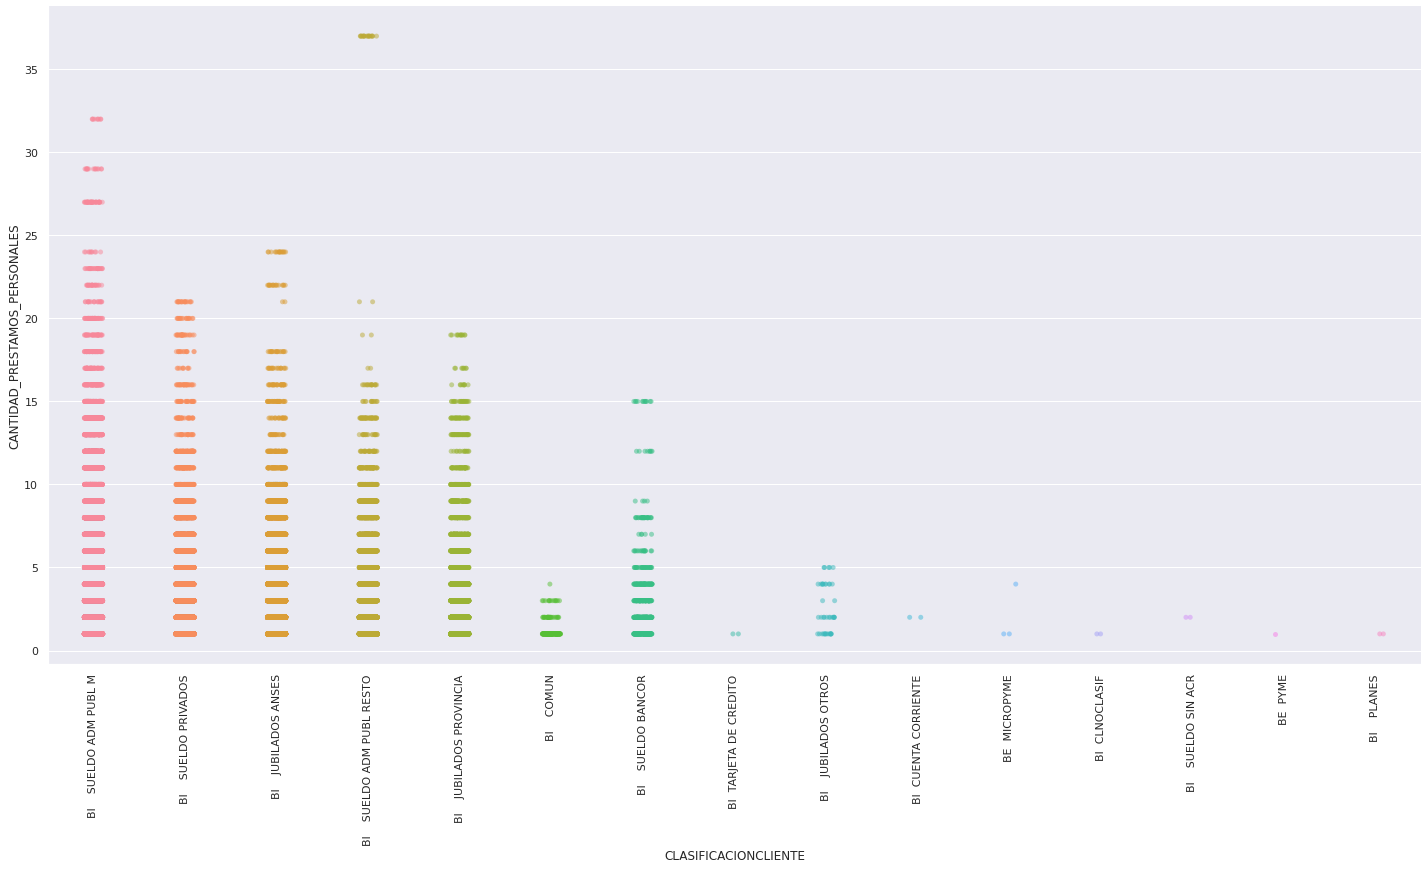

In [22]:
plt.figure(figsize = [15,15])
sns.catplot(kind = "strip", x = "CLASIFICACIONCLIENTE", y = "CANTIDAD_PRESTAMOS_PERSONALES", data = df[df["CANTIDAD_PRESTAMOS_PERSONALES"]>0],height = 10, aspect = 2, alpha = 0.5)
plt.xticks(rotation = 90)
plt.show()

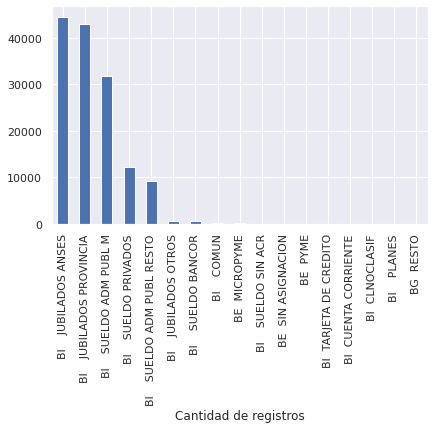

In [23]:
df.CLASIFICACIONCLIENTE.value_counts().plot(kind = "bar")
plt.xlabel("Cantidad de registros")
plt.show()




**4 - Distribución de Préstamos dados de alta por nivel socio económico**

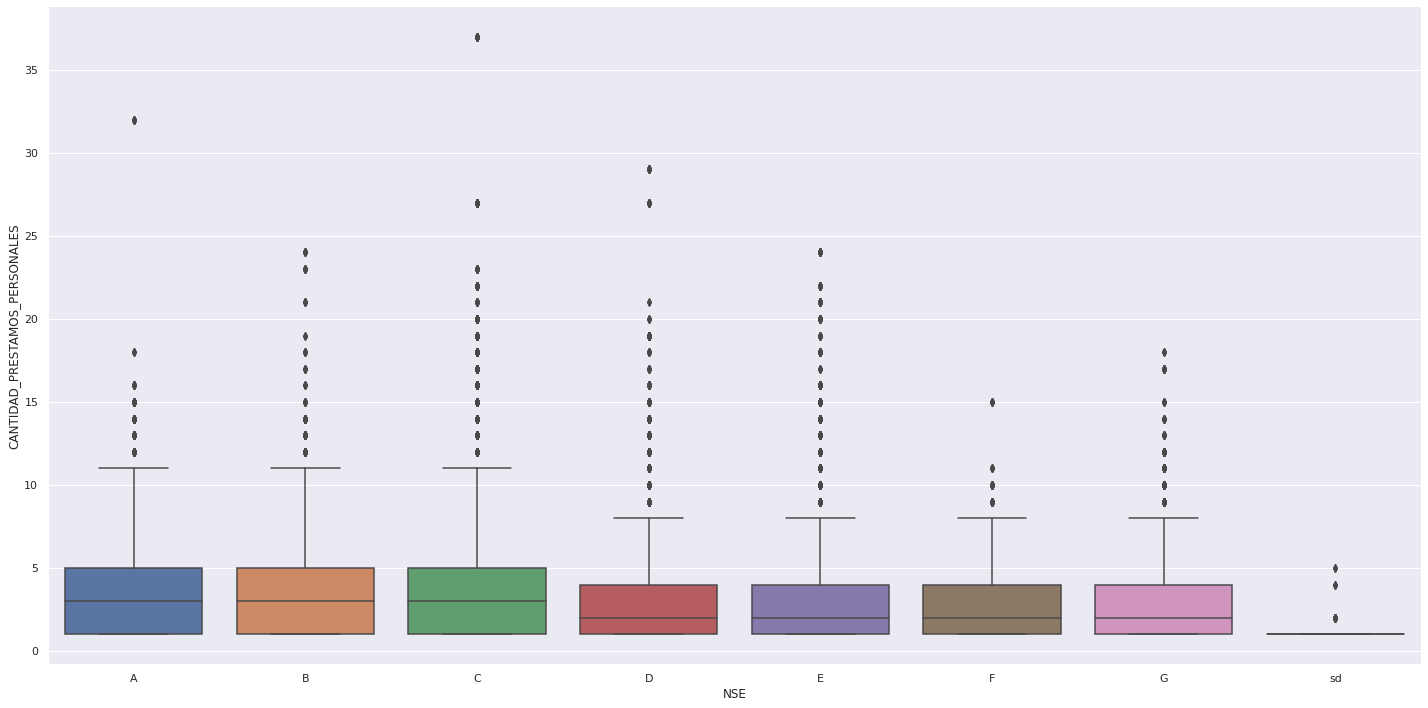

In [24]:
# Ordernar eje X
sns.catplot(kind = "box", x = "NSE", y = "CANTIDAD_PRESTAMOS_PERSONALES", data = df[df["CANTIDAD_PRESTAMOS_PERSONALES"]>0].sort_values(by = "NSE"), height = 10, aspect = 2)


**5 - Prestamo promedio por cliente**

In [25]:
# Describir:

print(df[(df['MNT_CAPITAL']>0) & (df['CANTIDAD_PRODUCTOS']==0)].shape)
# Vemos que si no tiene productos no tiene monto de capital

df[(df['MNT_CAPITAL']>0) & (df['TIENE_PRESTAMO_PERSONAL']==0)].shape
#Si no tiene prestamo personal puede tener monto de capital (otros productos)

(0, 45)


(707, 45)

In [26]:
mask = df['TIENE_PRESTAMO_PERSONAL']==1

prestamo_promedio = (df[mask].MNT_CAPITAL.sum() / df[mask]["ID_CLiente_BP"].nunique()).round(1)
print(f"Monto promedio por cliente con prestamo personal: {prestamo_promedio}")

Monto promedio por cliente con prestamo personal: 104627.2


In [27]:
#df.groupby("ID_CLiente_BP").MNT_CAPITAL.sum()

**6 - Prestamo promedio por tipo de canal de alta para el período comprendido**

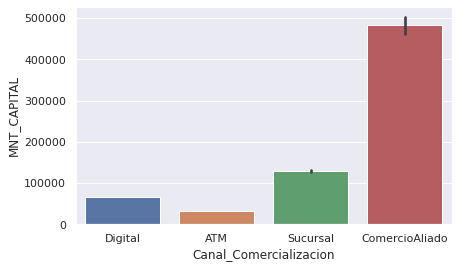

In [28]:
sns.barplot(data = df[mask],x = "Canal_Comercializacion", y = "MNT_CAPITAL", estimator = np.mean)

### Analisis de clientes con más de un Préstamo
1 - ¿Existen clientes con más de un préstamo dado de alta en el período de análsis? ¿Cuál es la cantidad de préstamos promedio por cliente?

2 - Haga un breve análisis descriptivo de éstos tipos de clientes y coméntelo


In [29]:
df_1 = df.groupby(by="CANTIDAD_PRESTAMOS_PERSONALES", dropna=False).count()

In [30]:
df_1['ID_CLiente_BP']

CANTIDAD_PRESTAMOS_PERSONALES
0     80707
1     20076
2     12610
3      8161
4      5924
5      4255
6      2945
7      2062
8      1528
9      1069
10      701
11      534
12      419
13      290
14      273
15      234
16      165
17       86
18       79
19       76
20       65
21       42
22       39
23       27
24       26
27       38
29       15
32        9
37       18
Name: ID_CLiente_BP, dtype: int64

In [31]:
df_1[2:]['ID_CLiente_BP'].sum()

41690

In [32]:
 # Considerando que habia clientes con más de un registro se considero los únicos de la variable ID_CLIENTE
 prestamos_prom = df.CANTIDAD_PRESTAMOS_PERSONALES.sum()/df["ID_CLiente_BP"].nunique()
 prestamos_prom

1.65564371480266

**2. Análisis descriptivo de estos clientes**

In [33]:
df[df['CANTIDAD_PRESTAMOS_PERSONALES']>=2]

,ID_CLiente_BP,ID_Linea_Prestamo,Canal_Comercializacion,Ctd_Dias_Plazo,MNT_CAPITAL,Tasa,Fec_Desembolso,Fec_Inicio_Prestamo,Fec_Fin_Prestamo,SEXO,EDAD,ANIOS_ANTIGUEDAD,SUCURSAL_ACREDITACION,SEGMENTO360,CLASIFICACIONCLIENTE,SHARE_MERCADO,TOTAL_ADEUDADO,CANTIDAD_ENTIDADES,SITUACION,POTENCIALIDAD_PP,MONTO_POTENCIAL_PP,UTILIZACION_TC,UTILIZACION_TD,CLASIFICACION_VALOR_MAC,BANCON_ACTIVO1,CANTIDAD_PRODUCTOS,TIENE_CAJA_AHORRO,TIENE_TARJETA_CREDITO,TIENE_PRESTAMO_PERSONAL,CANTIDAD_PRESTAMOS_PERSONALES,TIENE_PRESTAMO_HIPOTECARIO,CANTIDAD_PRESTAMOS_HIPOTECARIOS,USA_CUENTA_CORRIENTE,USA_CUENTA_ADELANTO,TIENE_SEGURO_VIDA,TIENE_SEGURO_PATRIMONIAL,TIENE_PLAZO_FIJO,TIENE_FONDO_COMUN_INVERSION,TIENE_DOLARES,TIENE_CAJA_SEGURIDAD,INGRESO,NSE,ENDEUDAMIENTO_202103,ROL_MONOTIIBB,REGIMEN_MONOT_IIBB
2312,1600611,PRPE_104PD,Digital,36.00,"20,332.00",52.00,28/4/2021,28/4/2021,1/5/2024,M,31,8,302,Clientes Cuenta Sueldo,BI SUELDO ADM PUBL M,1.00,426,1,1,0.00,0,ALTO,ALTO,MUY ALTO,1,3,1,1,1,8,0,0,0,0,0,0,0,0,0,0,89387,C,0.47,sd,sd
2313,1600618,PRPE_104PD,Digital,12.00,"28,449.00",45.00,6/1/2021,6/1/2021,1/2/2022,M,28,8,914,Clientes Cuenta Sueldo,BI SUELDO ADM PUBL M,0.98,354,2,1,0.00,0,ALTO,MEDIO,MUY ALTO,1,3,1,1,1,2,0,0,0,0,0,0,0,0,0,0,127866,B,0.67,sd,sd
2314,1600635,PRPE_104PD,Digital,72.00,"91,154.00",43.00,13/11/2020,13/11/2020,1/12/2026,M,28,8,305,Clientes Cuenta Sueldo,BI SUELDO ADM PUBL M,0.96,689,2,5,0.00,0,MEDIO,ALTO,MUY ALTO,1,4,1,1,1,4,0,0,0,0,1,0,0,0,0,0,90597,C,0.33,MONOTRIBUTO,A
2316,1600651,PRPE_104PD,Digital,12.00,"60,921.00",45.00,3/2/2021,3/2/2021,1/3/2022,M,28,8,324,Clientes Cuenta Sueldo,BI SUELDO ADM PUBL M,0.85,266,2,1,0.00,0,BAJO,ALTO,MUY ALTO,1,3,1,1,1,2,0,0,0,0,0,0,0,0,0,0,92033,C,0.25,sd,sd
2317,1600659,PRPE_104PD,Digital,36.00,"13,222.00",47.00,22/12/2020,22/12/2020,1/1/2024,M,27,8,902,Clientes Cuenta Sueldo,BI SUELDO ADM PUBL M,1.00,306,1,1,0.82,154600,ALTO,BAJO,MUY ALTO,1,5,1,1,1,3,0,0,0,1,1,0,0,0,0,0,193517,A,0.39,sd,sd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142176,2541105,PRPE_104PD,Digital,12.00,"25,405.00",49.00,5/3/2021,5/3/2021,1/4/2022,F,24,2,931,Clientes Cuenta Sueldo,BI SUELDO ADM PUBL M,1.00,235,1,1,0.59,137700,ALTO,MEDIO,MUY ALTO,1,3,1,1,1,4,0,0,0,0,0,0,0,0,0,0,72676,C,0.37,sd,sd
142177,2541105,PRPE_104PD,Digital,48.00,"35,553.00",49.00,10/2/2021,10/2/2021,1/3/2025,F,24,2,931,Clientes Cuenta Sueldo,BI SUELDO ADM PUBL M,1.00,235,1,1,0.59,137700,ALTO,MEDIO,MUY ALTO,1,3,1,1,1,4,0,0,0,0,0,0,0,0,0,0,72676,C,0.37,sd,sd
142179,2541121,PRPE_104PD,Digital,24.00,"38,597.00",47.00,25/2/2021,25/2/2021,1/3/2023,F,24,2,931,Clientes Cuenta Sueldo,BI SUELDO ADM PUBL M,1.00,501,1,1,0.00,48700,MEDIO,MEDIO,MUY ALTO,1,4,1,1,1,2,0,0,0,0,0,1,0,0,0,0,72970,C,0.31,sd,sd
142180,2541121,PRPE_147,ComercioAliado,60.00,"396,360.00",6.00,24/2/2021,24/2/2021,1/3/2026,F,24,2,931,Clientes Cuenta Sueldo,BI SUELDO ADM PUBL M,1.00,501,1,1,0.00,48700,MEDIO,MEDIO,MUY ALTO,1,4,1,1,1,2,0,0,0,0,0,1,0,0,0,0,72970,C,0.31,sd,sd


En este punto consideramos analizar las variables de cantidad de préstamos (numérica discreta) con los ingresos por cliente (numérica), mediante un mismo histograma de frecuencias.

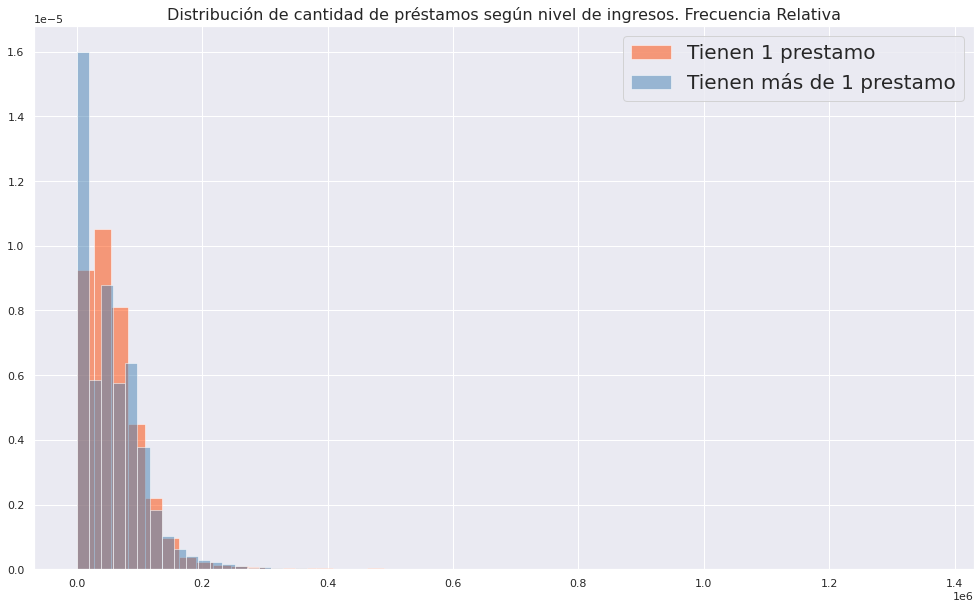

In [34]:
df_equal_1_prest = df[(df['CANTIDAD_PRESTAMOS_PERSONALES']==0) | (df['CANTIDAD_PRESTAMOS_PERSONALES']==1) ]
df_above_2_prest =df[df['CANTIDAD_PRESTAMOS_PERSONALES']>=2]

plt.figure(figsize=(15,10))
plt.hist(df_equal_1_prest['INGRESO'], color='orangered', bins=50, alpha=0.5, label="Tienen 1 prestamo ", density=True)
plt.hist(df_above_2_prest['INGRESO'], color='steelblue', bins=50, alpha=0.5, label="Tienen más de 1 prestamo",density=True) #aca importa el orden, cuidado con la superposición
plt.title("Distribución de cantidad de préstamos según nivel de ingresos. Frecuencia Relativa", fontsize = 16)

plt.legend(fontsize=20)
plt.show()

Por lo que se puede ver, a simple vista, el hecho de tener un préstamo o más de 1, no parece en principio estar siendo afectado por el nivel de ingresos del cliente.

Otra comparativa que realizamos es la cantidad de préstamos con la clasificación económica del cliente (que es el valor económico que posee el mismo para la entidad). Ambas variables categóricas las visualizamos en un mapa de calor

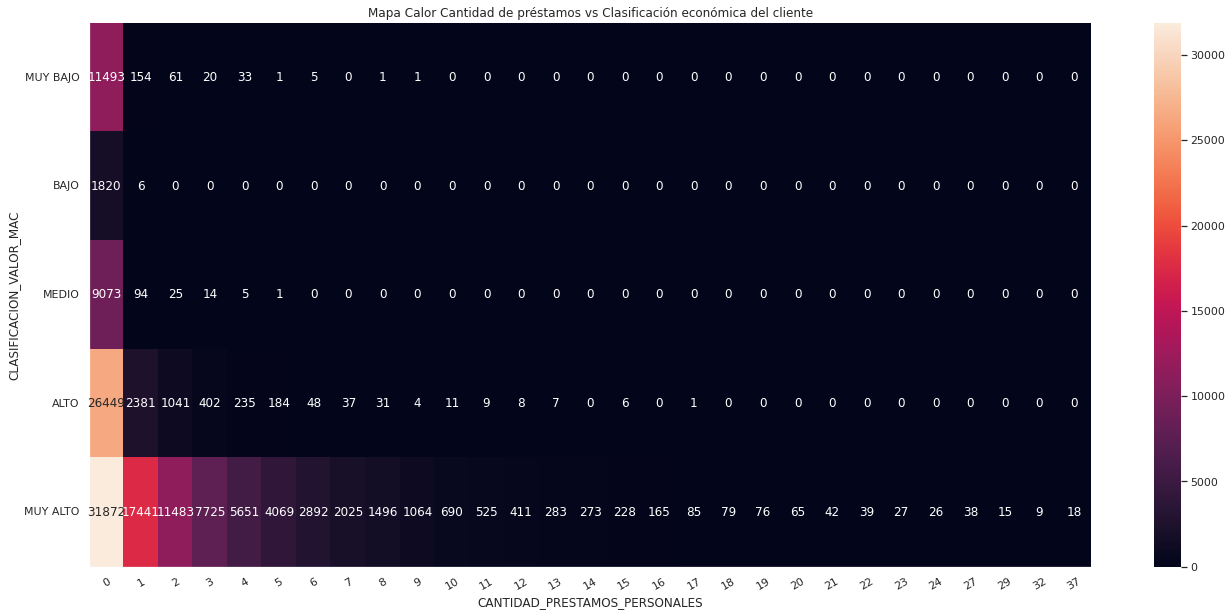

In [35]:
clasf_ord = ['MUY BAJO','BAJO','MEDIO','ALTO','MUY ALTO']
fig = plt.figure(figsize=(20,10))
exp = pd.crosstab(df.CLASIFICACION_VALOR_MAC,
                  df.CANTIDAD_PRESTAMOS_PERSONALES)
exp = exp.loc[clasf_ord]
sns.heatmap(exp, annot=True, fmt='g').set(title='Mapa Calor Cantidad de préstamos vs Clasificación económica del cliente')
plt.xticks(rotation=30)
plt.yticks(rotation=0)
sns.despine()

Acá si puede verse algo con más claridad. Aquellos clientes que poseen más de 1 préstamo, son en una gran mayoría clientes con un valor económico muy alto para el banco.

In [36]:
df[df['CANTIDAD_PRESTAMOS_PERSONALES']>=2].describe()

,ID_CLiente_BP,Ctd_Dias_Plazo,MNT_CAPITAL,Tasa,EDAD,ANIOS_ANTIGUEDAD,SUCURSAL_ACREDITACION,SHARE_MERCADO,TOTAL_ADEUDADO,CANTIDAD_ENTIDADES,SITUACION,POTENCIALIDAD_PP,MONTO_POTENCIAL_PP,BANCON_ACTIVO1,CANTIDAD_PRODUCTOS,TIENE_CAJA_AHORRO,TIENE_TARJETA_CREDITO,TIENE_PRESTAMO_PERSONAL,CANTIDAD_PRESTAMOS_PERSONALES,TIENE_PRESTAMO_HIPOTECARIO,CANTIDAD_PRESTAMOS_HIPOTECARIOS,USA_CUENTA_CORRIENTE,USA_CUENTA_ADELANTO,TIENE_SEGURO_VIDA,TIENE_SEGURO_PATRIMONIAL,TIENE_PLAZO_FIJO,TIENE_FONDO_COMUN_INVERSION,TIENE_DOLARES,TIENE_CAJA_SEGURIDAD,INGRESO,ENDEUDAMIENTO_202103
count,"41,690.00","41,609.00","41,690.00","41,690.00","41,690.00","41,690.00","41,690.00","41,690.00","41,690.00","41,690.00","41,690.00","41,690.00","41,690.00","41,690.00","41,690.00","41,690.00","41,690.00","41,690.00","41,690.00","41,690.00","41,690.00","41,690.00","41,690.00","41,690.00","41,690.00","41,690.00","41,690.00","41,690.00","41,690.00","41,690.00","41,690.00"
mean,"1,109,915.58",49.68,"53,895.96",47.25,48.68,10.39,530.12,0.84,269.29,1.95,1.12,0.22,"62,893.99",0.75,3.55,1.00,0.71,1.00,4.59,0.00,0.00,0.01,0.33,0.32,0.09,0.04,0.00,0.04,0.00,"59,165.98",0.47
std,"681,517.26",24.92,"83,178.70",5.51,15.42,3.21,264.01,0.23,348.71,1.17,0.74,0.27,"122,227.79",0.43,1.09,0.01,0.45,0.00,3.38,0.06,0.06,0.08,0.47,0.47,0.28,0.21,0.07,0.19,0.04,"52,445.13",3.22
min,67.00,12.00,10.00,-1.00,18.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"517,015.00",24.00,"12,223.75",44.00,36.00,8.00,324.00,0.74,94.00,1.00,1.00,0.00,0.00,1.00,3.00,1.00,0.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"17,874.00",0.25
50%,"1,108,833.00",67.00,"30,479.00",49.00,47.00,12.00,374.00,0.95,188.50,2.00,1.00,0.10,"12,300.00",1.00,3.00,1.00,1.00,1.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"47,301.00",0.33
75%,"1,568,051.00",72.00,"60,921.00",50.00,62.00,13.00,902.00,1.00,351.00,2.00,1.00,0.41,"74,400.00",1.00,4.00,1.00,1.00,1.00,6.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,"84,042.50",0.46
max,"2,748,445.00",72.00,"1,789,915.00",73.00,82.00,13.00,943.00,1.00,"16,039.00",14.00,9.00,1.00,"2,571,000.00",1.00,9.00,1.00,1.00,1.00,37.00,1.00,3.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,"968,220.00",363.28


Observando además la medidas para esta subpoblación de clientes con más de un préstamos vemos algunas particularidades:

El monto de capital promedio asociado es de $ 53.896

El ingreso promedio asociado es de $ 59.166

La edad promedio de los clientes cercana a los 50.

La antiguedad promedio de los clientes es entre 10 y 11

### Análisis de probabilidades condicionales e independencia entre dos variables
**1 - ¿Existe algún tipo de relación entre el alta de Prestamos y el nivel de endeudamiento?**


In [37]:
vara = "TIENE_PRESTAMO_PERSONAL"
varb = "ENDEUDAMIENTO_202103"
# probA es probabilidad de que 
condition_A = (df[vara] == 1)
probA = condition_A.sum() / df[vara].shape[0]
# probB es probabilidad de que el endeudamiento sea mayor al promedio 
condition_B = df[varb] > 0
probB = condition_B.sum() / df[varb].shape[0]

#probAB probabilidad de que tenga un prestamo personal y que el endeudamiento sea mayor al promedio
probAB = (condition_A & condition_B).sum() / df[condition_B].shape[0]

print(f"Probabilidad A {probA.round(3)}")
print(f"Probabilidad B {probB.round(3)}")
print(f"Probabilidad A tal que B {probAB.round(3)}")

Probabilidad A 0.434
Probabilidad B 0.683
Probabilidad A tal que B 0.627


probabilidad de A tal que B no es igual a la probabilidad de A

-> Entonces A y B no son independientes

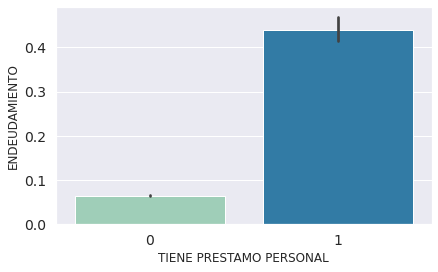

In [38]:
# Grafico de distribucion de endeudamiento  de clientes con alta de prestamos vs clientes sin alta de prestamos
sns.barplot(x = vara, y = varb, data = df, palette="YlGnBu")
sns.set_style("whitegrid")
#sns.despine(left=True, bottom=True)
plt.xlabel("TIENE PRESTAMO PERSONAL", size = 12)
plt.ylabel("ENDEUDAMIENTO", size = 12)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show()  

**2 - ¿Existe algún tipo de relación entre la edad del cliente y el canal por el cual solicita el préstamo?**

In [39]:
df["Mayor60"] = df["EDAD"] > 60

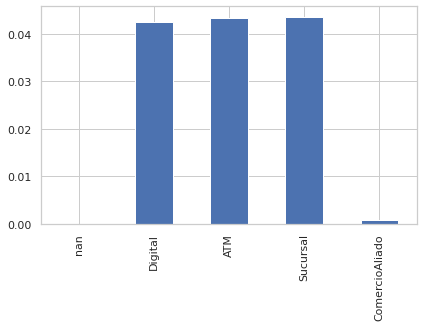

In [40]:
# Hacer con probabilidades??
# PRESTAMO vs INGRESO	
varA = "Canal_Comercializacion"
varB = "Mayor60"
canales = []
probs = []
for canal in df[varA].unique():
  probAB = ((df[varA] == canal) & (df[varB] == 1)).sum() / df.shape[0]
  canales.append(canal)
  probs.append(probAB)

probs = pd.Series(probs, index = canales)
probs.plot(kind = "bar")

In [41]:
edad= "EDAD"
canal= "Canal_Comercializacion"
df[[canal,edad]].groupby(canal).median()

,EDAD
Canal_Comercializacion,
ATM,59.00
ComercioAliado,43.00
Digital,42.00
Sucursal,57.00


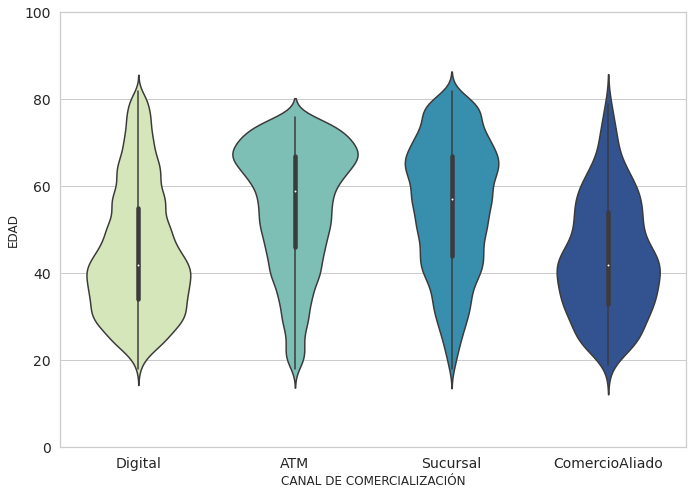

In [42]:
plt.figure(figsize = [10,8])
sns.violinplot(x = "Canal_Comercializacion", y = "EDAD", data = df[df["TIENE_PRESTAMO_PERSONAL"] == 1], palette="YlGnBu")
sns.set_style("whitegrid")
#sns.despine(left=True, bottom=True)
plt.ylim(0, 100)
plt.xlabel("CANAL DE COMERCIALIZACIÓN", size = 12)
plt.ylabel("EDAD", size = 12)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show()  

A partir del gráfico se puede inferir que podrìa existir una relación entre la edad del cliente y el canal de comercialización.
Los clientes de alrededor de 60 años utilizan más los canales ATM y Sucursal(Mediana ATM=59, Sucursal= 57) mientras aquellos cercanos a los 40 años prefieren los medios digital y comercio aliado (Mediana Digital=42, CA=43).

**3 - Seleccione 2 variables más que considere de interés y relaciónelas con el fin de obtener conclusiones preliminares**

In [43]:
# PRESTAMO vs INGRESO	
varA = "TIENE_PRESTAMO_PERSONAL"
varB = "INGRESO"
# probA es probabilidad de que 
condition_A = (df[varA] == 1)
probA = condition_A.sum() / df[varA].shape[0]
# probB es probabilidad de que el INGRESO sea mayor al promedio 
condition_B = df[varB] > df[varB].mean()
probB = condition_B.sum() / df[varB].shape[0]

#probAB probabilidad de que tenga un prestamo personal y que el INGRESO sea mayor al promedio
probAB = (condition_A & condition_B).sum() / df[condition_A].shape[0]

print(f"Probabilidad A {probA.round(3)}")
print(f"Probabilidad B {probB.round(3)}")
print(f"Probabilidad A tal que B {probAB.round(3)}")

Probabilidad A 0.434
Probabilidad B 0.39
Probabilidad A tal que B 0.374


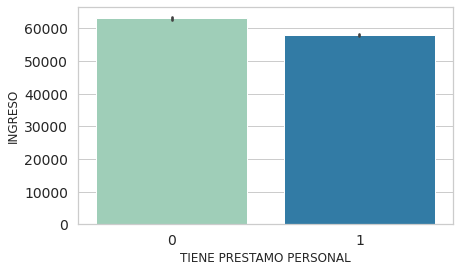

In [44]:
# Grafico de INGRESO  de clientes con alta de prestamos vs clientes sin alta de prestamos
sns.barplot(x = varA, y = varB, data = df, palette="YlGnBu")
sns.set_style("whitegrid")
#sns.despine(left=True, bottom=True)
plt.xlabel("TIENE PRESTAMO PERSONAL", size = 12)
plt.ylabel("INGRESO", size = 12)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show()  

In [45]:
varA = "TIENE_PRESTAMO_PERSONAL"
varB = "INGRESO"
avg_ingreso = df[varB].mean()  #ingreso promedio para la población completa
avg_ingreso

60888.89762270746

In [46]:
df["INGRESO"].describe()

count     142,473.00
mean       60,888.90
std        50,996.18
min             0.00
25%        21,409.00
50%        50,080.00
75%        81,467.00
max     1,362,310.00
Name: INGRESO, dtype: float64

In [47]:
df["INGRESO"].median()

50080.0

In [48]:
is_above_avg = df[varB] > avg_ingreso #población que cobra más que la media de los ingresos
tiene_prestamo = df[varA] == 1 #población que tiene un préstamo personal
intersection_count = len(df[tiene_prestamo & is_above_avg])

In [49]:
#Calculamos la probabilidad general de tener un prestamo P(A)
prob_prestamo= len (df[tiene_prestamo]) / len(df[varA]) 
prob_prestamo

0.4335277561362504

In [50]:
#Calculamos la probabilidad de tener un prestamo dado que su ingreso es superior a la media; ie P(A|B)
p_condicional = len(df[tiene_prestamo & is_above_avg])/len(df[is_above_avg])
p_condicional

0.41509977148820554